In [28]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from convolution.conv_3d import Conv3D
from convolution.conv_2d import Conv2D

from pooling.maxpool_3d import MaxPooling3D
from pooling.maxpool_2d import MaxPooling2D

from layers.layer_dense import Layer_Dense
from activation_func.relu import Activation_ReLU
from loss.activation_softmax_loss_categorical_crossentropy import Activation_Softmax_Loss_CategoricalCrossentropy
from optimizers.adam import Optimizer_Adam 
from model.model import Model
from layers.flatten import Flatten
from activation_func.softmax import Activation_Softmax
from loss.categorical_cross_entropy import Loss_CategoricalCrossentropy
from accuracy.accuracy_categorical import Accuracy_Categorical

In [29]:
#transform data to tensors and normalize them 
transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
     ])

#get build in dataset  
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,
                                      download=True,transform=transform)

#python iterable over the dataset || we are loading the whole dataset as batch size,we gonna use custom indexing later    
trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset),
                                          shuffle=True, num_workers=2)

testset=torchvision.datasets.CIFAR10(root='./data',train=False,
                                     download=True,transform=transform)

testloader=torch.utils.data.DataLoader(testset,batch_size=len(testset),
                                       shuffle=False,num_workers=2)
#labels  
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [30]:
#display few images in a list 
def imageshow(img_list, label_list):
    fig, axs = plt.subplots(1, len(img_list), figsize=(10, 4))

    for i, (img, label) in enumerate(zip(img_list, label_list)):
        img = img / 2 + 0.5
        npimg = img.numpy()
        axs[i].imshow(np.transpose(npimg, (1, 2, 0)))
        axs[i].set_title(classes[label])
        axs[i].axis('off')

    plt.show()

In [31]:
#get train/test data   
x_train, y_train = next(iter(trainloader))
x_test,y_test=next(iter(testloader))

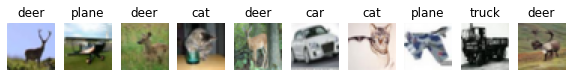

In [32]:
#show some image data 
imageshow(x_train[:10],y_train[:10])

In [33]:
#reshape the x(train,test) to have[N,H,W,NC] instead of [N,NC,H,W] 
x_train=x_train.permute(0,2,3,1)
x_test=x_test.permute(0,2,3,1)

In [34]:
#convert torch tensors to numpy arrays 
x_train=x_train.numpy()
y_train=y_train.numpy()
x_test=x_test.numpy()
y_test=y_test.numpy()

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

this is the first try the hyperparameters where random selected to test the network 

In [63]:
model=Model()
#conv layer1(conv3d,relu,max-pool)
model.add(Conv3D([3,3,3,32],32,padding=1,stride=1))
model.add(Activation_ReLU())
model.add(MaxPooling3D(3,3))

#conv layer2(conv3d,relu,max-pool)
model.add(Conv3D([3,3,32,15],15,padding=1,stride=1))
model.add(Activation_ReLU())
model.add(MaxPooling3D(3,2))
#flatten layer for further fc layers  
model.add(Flatten())

#fully connected layer 1 
model.add(Layer_Dense(240,120))
model.add(Activation_ReLU())
#fully connected layer 2 + softmax  
model.add(Layer_Dense(120,10))
model.add(Activation_Softmax())

In [64]:
#set loss,optimizer and accuracy 
model.set(
loss=Loss_CategoricalCrossentropy(),
optimizer=Optimizer_Adam(decay=5e-5),
accuracy=Accuracy_Categorical()
)

In [65]:
#finalize the model
model.finalize()

In [ ]:
model.train(x_train,y_train,validation_data=(x_test,y_test),epochs=1,batch_size=32,print_every=1)